## Creating CNN Using Scratch And Transfer Learning

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [ ]:
folders

[]

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
13/13 [==============================] - 24s 2s/step - loss: 1.5801 - accuracy: 0.5168 - val_loss: 0.7589 - val_accuracy: 0.3284
Epoch 2/50
13/13 [==============================] - 28s 2s/step - loss: 0.6998 - accuracy: 0.5288 - val_loss: 0.6424 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 22s 2s/step - loss: 0.6735 - accuracy: 0.5553 - val_loss: 0.6804 - val_accuracy: 0.5597
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.6242 - accuracy: 0.6466 - val_loss: 0.7913 - val_accuracy: 0.3657
Epoch 5/50
13/13 [==============================] - 25s 2s/step - loss: 0.5935 - accuracy: 0.6442 - val_loss: 0.7705 - val_accuracy: 0.4254
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 0.4902 - accuracy: 0.7812 - val_loss: 0.9993 - val_accuracy: 0.3806
Epoch 7/50
13/13 [==============================] - 22s 2s/step - loss: 0.4772 - accuracy: 0.7716 - val_loss: 0.9162 - val_accuracy: 0.4030
Epoch 8/50
13/13 [==

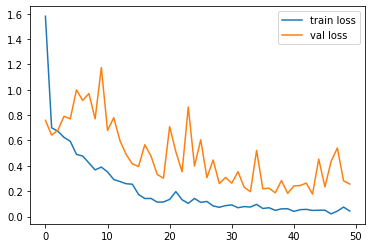

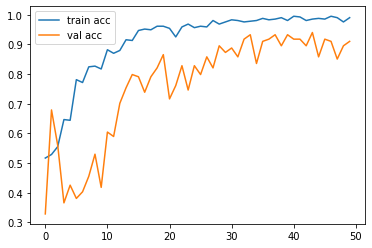

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:

y_pred = model.predict(test_set)


5/5 [==============================] - 2s 324ms/step


In [ ]:
y_pred

array([[9.99998271e-01, 1.62836818e-06],
       [3.62110697e-02, 9.63788986e-01],
       [9.99998271e-01, 1.65526103e-06],
       [9.99870539e-01, 1.29597480e-04],
       [1.30125973e-02, 9.86987233e-01],
       [9.99991000e-01, 8.97239170e-06],
       [9.37825907e-03, 9.90621865e-01],
       [1.39211714e-02, 9.86078739e-01],
       [9.99992669e-01, 7.30290867e-06],
       [9.99999344e-01, 5.93408970e-07],
       [9.99999940e-01, 7.81994414e-10],
       [9.99998987e-01, 9.68716449e-07],
       [9.99995053e-01, 4.84077873e-06],
       [9.80143666e-01, 1.98563002e-02],
       [1.63759347e-02, 9.83623981e-01],
       [9.99998271e-01, 1.70128760e-06],
       [9.74136055e-01, 2.58639343e-02],
       [9.99989212e-01, 1.06915932e-05],
       [9.99263287e-01, 7.36752525e-04],
       [6.51199929e-03, 9.93488014e-01],
       [6.02548756e-02, 9.39745009e-01],
       [9.99999344e-01, 5.85719135e-07],
       [9.99973714e-01, 2.62651774e-05],
       [9.99998629e-01, 1.31700654e-06],
       [9.999999

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.01155142, 0.98844856]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
